In [1]:
%run imports.ipynb

In [2]:
samples = [os.path.basename(f).split('.')[0] for f in glob.glob('/data/project/SNUH_DNMT3A/pipelines/SAMPLE-FETCH/TCGA-METH/data/*.txt')]
distances = range(2, 51)

methlevel_files = list(sorted(glob.glob('/data/project/SNUH_DNMT3A/pipelines/TCGA-LODI/result/02_probepair_methlevels/*.csv')))
len(methlevel_files)

27860

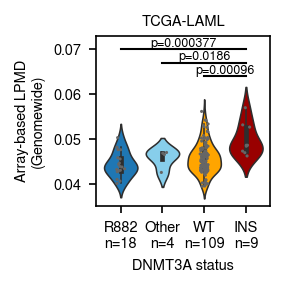

In [47]:
data = pd.read_csv('source_data/laml_genomewide_lpmd.csv')

violin_kws = {
    'linewidth': 0.75,
#     'flierprops': {'marker': '.', 'markersize': 1.0},
#     'showfliers': False,
    'scale': 'width',
    'order': ['R882', 'Other', 'WT', 'INS'],
    'palette': ['C0', 'skyblue', 'orange', '#990000'],
    'saturation': 1.0,
}

d = data

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('TCGA-LAML', fontsize=7, pad=5)

sns.violinplot(data=d, x='status', y='lpmd', **violin_kws)
sns.stripplot(data=d, x='status', y='lpmd', order=['R882', 'Other', 'WT', 'INS'], color='0.4', s=3)

ax.set_xticklabels([f'{l}\nn={d.status.value_counts()[l]}' for l in ['R882', 'Other', 'WT', 'INS']])

ax.set_xlabel('DNMT3A status')
ax.set_ylabel('Array-based LPMD\n(Genomewide)')

step = 0.003
y = 0.064
for i, status in enumerate(['WT', 'Other', 'R882']):
    ax.plot([2-i, 3], [y + step * i, y + step * i], lw=1, c='k')
    
    _, p = stats.mannwhitneyu(d[d.status == status].lpmd, d[d.status == 'INS'].lpmd)
    ax.text(2.5-i/2, y + step * i, f'p={p:.3g}', va='bottom', ha='center', fontsize=6)
    
ax.set_ylim([ax.get_ylim()[0], 0.073])

save_figures('source_data_figures/laml_lpmd/laml_violinplot')

LinregressResult(slope=-0.00844941272547324, intercept=0.052908213340991314, rvalue=-0.5839740893892376, pvalue=0.0011039432016854433, stderr=0.0023034590654024173)


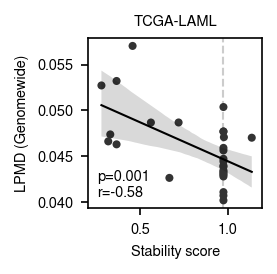

In [46]:
d = data[data.status != 'WT']
mask = d.DNMT3A_stability.notnull()
res = stats.linregress(d[mask].DNMT3A_stability, d[mask].lpmd)

print(res)

fig = plt.figure()
ax = fig.add_subplot(111)

scatter_kws = {
    's': 15,
    'ec': 'none',
    'color': '0.2',
    'alpha': 1.0,
}
line_kws = {
    'lw': 1,
#     'ls': ,
    'color': 'k',
}

ax.axvline(0.9764945, ls='--', lw=1, c='0.8', zorder=-1)

sns.regplot(
    data=d,
    x='DNMT3A_stability',
    y='lpmd',
    scatter_kws=scatter_kws,
    line_kws=line_kws,
    ax=ax
)

ax.set_xlabel('Stability score')
ax.set_ylabel('LPMD (Genomewide)')
ax.set_title('TCGA-LAML', fontsize=7)

ax.text(
    x=0.05,
    y=0.05,
    s=f'p={res.pvalue:.3f}\nr={res.rvalue:.2f}',
    ha='left',
    va='bottom',
    fontsize=7,
    transform=ax.transAxes,
)

ax.set_xlim([0.2, 1.2])

save_figures('source_data_figures/laml_lpmd/laml_stability_lpmd_correlation')